In [1]:
import pandas as pd
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('中间数据集\\表1与表2拼接后的数据集.xlsx')
df = df.drop(['文物编号', '采样位置', '纹饰', '表面风化', '颜色', '风化具体情况'], axis=1)
df.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,高钾,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,铅钡,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,高钾,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,高钾,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,高钾,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [3]:
labelencoder = LabelEncoder()
df['类型'] = labelencoder.fit_transform(df['类型'])
df.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,0,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,1,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,1,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [4]:
X = df.drop("类型", axis=1)
y = df["类型"]

# 划分数据集：将整个数据集按行（样本）划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

# 决策树分类器
tree = DecisionTreeClassifier(random_state=5, max_depth=2)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

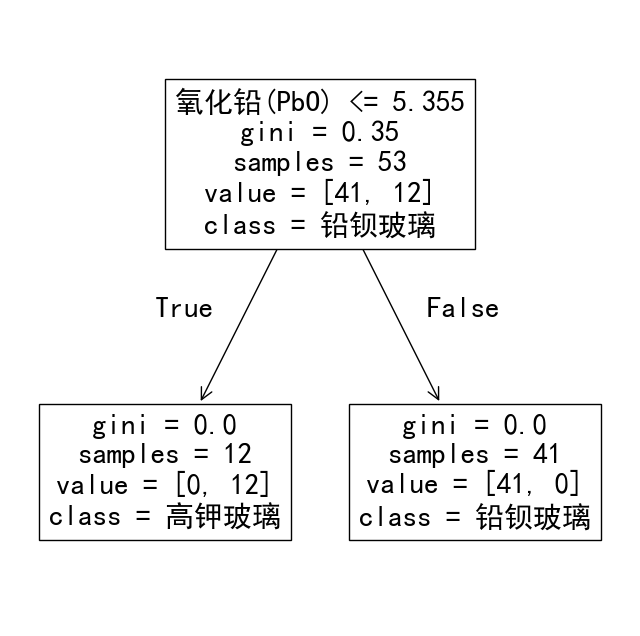

In [11]:
from sklearn.tree import plot_tree

# 绘制决策树
fig, ax = plt.subplots(figsize=(8, 8))
plot_tree(tree, feature_names=X.columns, class_names=['铅钡玻璃', '高钾玻璃'], ax=ax)
fig.savefig('图片\\5_分类规律可视化-基于决策树.eps')

In [7]:
y_train.value_counts()

类型
0    41
1    12
Name: count, dtype: int64

In [8]:
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat = confusion_matrix(y_test, y_pred, labels=[1, 0])

# 计算AUC和ROC曲线下的面积(AUC value)和横坐标为fpr,纵坐标为tpr的点
auc_value = metrics.roc_auc_score(y_test, y_pred)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc_point = auc(fpr, tpr)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


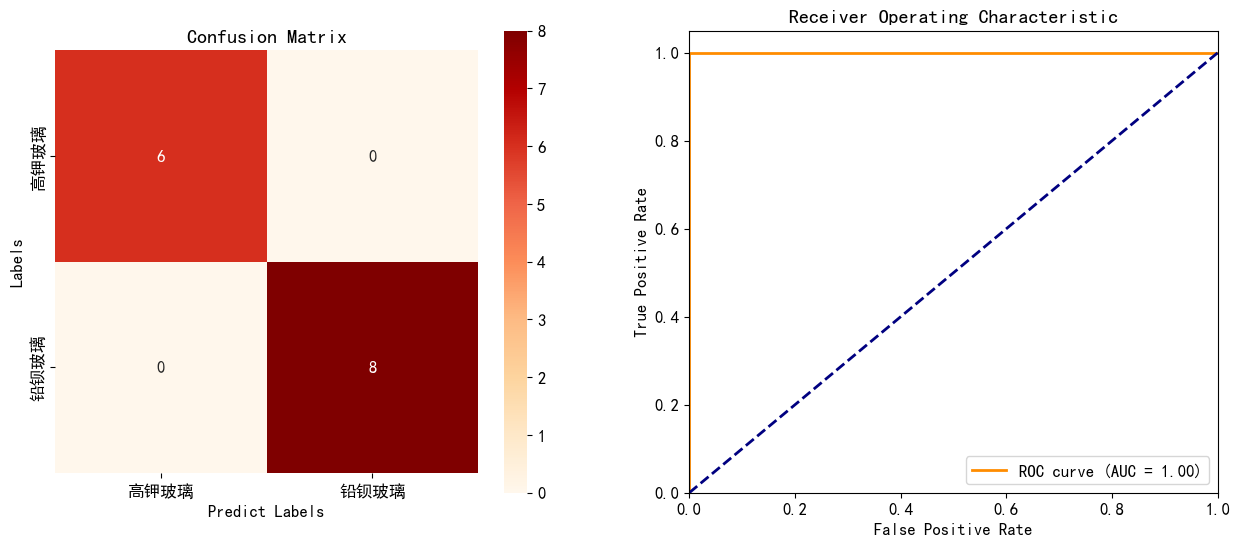

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.heatmap(mat, annot=True, square="equal", cmap="OrRd", ax=ax[0],
    xticklabels=['高钾玻璃', '铅钡玻璃'], 
    yticklabels=['高钾玻璃', '铅钡玻璃'])
ax[0].set_xlabel("Predict Labels")
ax[0].set_ylabel("Labels")
ax[0].set_title("Confusion Matrix")

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_point)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.savefig('图片\\6_对树的分类测试.eps')

In [10]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

